In [15]:
import pandas as pd

<h1 align="center"><strong> Off the Chart: 60 Years of Generational Music</strong></h1>

*by Oluwaseyi Folorunso*

---

## 📌 **[Intro]**

This project explores how the most popular music in the United States has evolved across four key years: **1965, 1985, 2005, and 2025**. Using data from:

- **Billboard Hot 100 charts** (scraped)
- **Spotify API and iTunes API** (for genre)
- **Genius Lyrics API** (for NLP)

We will analyze changes/growth in lyrical trends over the years, sentiment disparities in lyrics over time, and genre evolution.


---
## 🎶 **[Billboard Hot 100]**

The Billboard Hot 100 is a record chart of songs in the United States published weekly by Billboard magazine. The chart is based on song sales (physical and digital), online music streaming, and radio airplay in the U.S. For almost 70 years, the Billboard Hot 100 has been the music industry standard record chart, hence why I decided to begin this project by scraping the charts for the aforementioned years. For the years 1965, 1985 and 2005, I decided on the end of August, as most consider summer to be the peak of yearly music consumption; while for 2025, I used present day chart info (currently May 2024).

*All dataframes were saved to project directory as .csv files:*

In [4]:
charts_1965 = pd.read_csv('hot100_1965.csv')
charts_1965.head()

,rank,title,artist
0,1,I Got You Babe,Sonny & Cher
1,2,Help!,The Beatles
2,3,California Girls,The Beach Boys
3,4,Unchained Melody,The Righteous Brothers
4,5,It's The Same Old Song,Four Tops


In [5]:
charts_1985 = pd.read_csv('hot100_1985.csv')
charts_1985.head()

,rank,title,artist
0,1,The Power Of Love,Huey Lewis & The News
1,2,St. Elmo's Fire (Man In Motion),John Parr
2,3,Freeway Of Love,Aretha Franklin
3,4,We Don't Need Another Hero (Thunderdome),Tina Turner
4,5,Summer Of '69,Bryan Adams


In [6]:
charts_2005 = pd.read_csv('hot100_2005.csv')
charts_2005.head()

,rank,title,artist
0,1,We Belong Together,Mariah Carey
1,2,Don't Cha,The Pussycat Dolls Featuring Busta Rhymes
2,3,Pon de Replay,Rihanna
3,4,Let Me Hold You,Bow Wow Featuring Omarion
4,5,You And Me,Lifehouse


In [7]:
charts_2025 = pd.read_csv('hot100_2025.csv')
charts_2025.head()

,rank,title,artist
0,1,Luther,Kendrick Lamar & SZA
1,2,Die With A Smile,Lady Gaga & Bruno Mars
2,3,Ordinary,Alex Warren
3,4,Nokia,Drake
4,5,A Bar Song (Tipsy),Shaboozey


Using BeautifulSoup through *scraper.py*, I scraped the above charts from the pertinent Billboard webpages and then carried out necessary data cleaning as certain labels found on their site, such as ***NEW***, ***RE-ENTRY***, etc from interfering with  artist names and/or song titles and ultimately resulting in wrong information.


---
## 🟢 **[Spotify API, iTunes API and Genius Lyrics API]**

Afterwards the next step was to sort songs by their respective genres to allow closer analysis for the project. For this step, genre-sourcing from credible music streaming sources, Spotify and iTunes, was utilized using the *genre_finder.py* script.

In [9]:
charts_1965_with_genre = pd.read_csv('hot100_1965_with_genres.csv')
charts_1965_with_genre.head()

,rank,title,artist,genre
0,1,I Got You Babe,Sonny & Cher,Pop
1,2,Help!,The Beatles,"classic rock, psychedelic rock"
2,3,California Girls,The Beach Boys,baroque pop
3,4,Unchained Melody,The Righteous Brothers,Pop
4,5,It's The Same Old Song,Four Tops,"motown, northern soul, soul"


In [10]:
charts_1985_with_genre = pd.read_csv('hot100_1985_with_genres.csv')
charts_1985_with_genre.head()

,rank,title,artist,genre
0,1,The Power Of Love,Huey Lewis & The News,Rock
1,2,St. Elmo's Fire (Man In Motion),John Parr,"french jazz, vocal jazz, bossa nova"
2,3,Freeway Of Love,Aretha Franklin,"soul, motown, jazz blues"
3,4,We Don't Need Another Hero (Thunderdome),Tina Turner,R&B/Soul
4,5,Summer Of '69,Bryan Adams,Rock


In [17]:
charts_2005_with_genre = pd.read_csv('hot100_2005_with_genres.csv')
charts_2005_with_genre.head()

,rank,title,artist,genre
0,1,We Belong Together,Mariah Carey,christmas
1,2,Don't Cha,The Pussycat Dolls Featuring Busta Rhymes,Pop
2,3,Pon de Replay,Rihanna,Pop
3,4,Let Me Hold You,Bow Wow Featuring Omarion,r&b
4,5,You And Me,Lifehouse,post-grunge


In [13]:
charts_2025_with_genre = pd.read_csv('hot100_2025_with_genres.csv')
charts_2025_with_genre.head()

,rank,title,artist,genre
0,1,Luther,Kendrick Lamar & SZA,"hip hop, west coast hip hop"
1,2,Die With A Smile,Lady Gaga & Bruno Mars,"art pop, pop"
2,3,Ordinary,Alex Warren,Pop
3,4,Nokia,Drake,"rap, hip hop"
4,5,A Bar Song (Tipsy),Shaboozey,Country


Further, given both *hot_100_{year}.csv* and *hot_100_with_genre_{year}.csv* files, the script, *genius_lyrics*, merges the artist based on artist and song title match and uses the Genius Lyrics API to extract each song's lyrics from the Genius website, one of the most reliable and most popular fites for song lyrics worldwide, cleans the lyrics by removing any punctuations, extra whitespace and subheadings ("[Chorus]", "[Intro]" etc.) and saves the output as *clean_lyrics*.

A new dataframe is created with the earlier merge of artist, song title and genre, with the columns *lyrics* and *clean_lyrics* added with relevant data.

*Data for 1985 Hot 100 below for visualization.*

In [21]:
raw_and_clean_lyrics_1985 = pd.read_csv('lyrics_1985_data.csv')
raw_and_clean_lyrics_1985.head()

,song_title,artist,genre,lyrics,clean_lyrics
0,The Power Of Love,Huey Lewis & The News,Rock,The power of love is a curious thing\nMake a o...,the power of love is a curious thing make a on...
1,St. Elmo's Fire (Man In Motion),John Parr,"french jazz, vocal jazz, bossa nova",Man In Motion was the name of the two-year… Re...,man in motion was the name of the twoyear… rea...
2,Freeway Of Love,Aretha Franklin,"soul, motown, jazz blues",It also won a Grammy for “Best Female R&B Voca...,it also won a grammy for “best female rb vocal...
3,We Don't Need Another Hero (Thunderdome),Tina Turner,R&B/Soul,Out of the ruins\nOut from the wreckage\nCan't...,out of the ruins out from the wreckage cant ma...
4,Summer Of '69,Bryan Adams,Rock,I got my first real six-string\nBought it at t...,i got my first real sixstring bought it at the...


As seen in the above previews of the datasets, the *genre* column provides detailed descriptions of the genres, specifically because the genre information Spotify API delivers is input this way unlike the iTunes API that usually simplifies the genre into one or two words alone.

Here, we take a similar approach in order to narrow down our genre disparity and analyze more readably. The *cleanlyr_simpgenre.py* script includes a function:
```
def simplify_genre(genre_str):
    if not isinstance(genre_str, str):
        return "Unknown"
    
    genre_str = genre_str.lower()
   
    if "christian" in genre_str or "gospel" in genre_str or "worship" in genre_str:
        return "Christian"
    elif "hip hop" in genre_str or "rap" in genre_str or "trap" in genre_str:
        return "Hip-Hop"
    elif "pop" in genre_str or "contemporary" in genre_str or "synthpop" in genre_str or "dance pop" in genre_str or "doo-wop" in genre_str:
        return "Pop"
    elif "rock" in genre_str or "punk" in genre_str or "grunge" in genre_str or "post-grunge" in genre_str or "post-rock" in genre_str:
        return "Rock"
    elif "r&b" in genre_str or "new jack swing" in genre_str:
        return "R&B"
    elif "soul" in genre_str:
        return "Soul"
    elif "country" in genre_str:
        return "Country"
    elif "dance" in genre_str or "electronic" in genre_str or "edm" in genre_str or "house" in genre_str or "trance" in genre_str:
        return "Dance"
    elif "latin" in genre_str or "reggaeton" in genre_str:
        return "Latin"
    elif "folk" in genre_str:
        return "Folk"
    elif "metal" in genre_str:
        return "Metal"
    elif "jazz" in genre_str:
        return "Jazz"
    elif "blues" in genre_str:
        return "Blues"
    elif "alternative" in genre_str:
        return "Alternative"
    elif "latino" in genre_str or "reggaeton" in genre_str or "latin" in genre_str:
        return "Reggaeton"
    elif "k-pop" in genre_str or "korean pop" in genre_str:
        return "K-Pop"
    elif "christmas" in genre_str or "holiday" in genre_str:
        return "Holiday"
    elif "disco" in genre_str:
        return "Disco"
    else:
        return "Other"
```
Which narrows down each song's genre to the most relevant one, outputs and saves a .csv file with song and "clean lyric" data with more trackable genre  information.

We have the most recent 2025 Hot 100 Billboard Chart below for reference:

In [20]:
cleanlyrics_simplifiedgenre_2025 = pd.read_csv('cleanlyrics_simplifiedgenre_2025.csv')
cleanlyrics_simplifiedgenre_2025.head()

,song_title,artist,simplified_genre,clean_lyrics
0,Luther,Kendrick Lamar & SZA,Hip-Hop,the title comes from the… read more if this wo...
1,Die With A Smile,Lady Gaga & Bruno Mars,Pop,ooh ooh i i just woke up from a dream where yo...
2,Ordinary,Alex Warren,Pop,they say the holy waters watered down and this...
3,Nokia,Drake,Hip-Hop,whos callin my phone whos callin that shit who...
4,A Bar Song (Tipsy),Shaboozey,Country,my baby want a birkin shes been tellin me all ...


As seen above the *genre* column has been simplified to the main genre of the song. For  example, "west coast hip hop" as simply "Hip-Hop" for Kendrick Lamar & SZA's #1 hit song "luther".

---
## ✍️ **Genius Lyrics NLP Analysis**

For our NLP Analysis, the two major focal points were:

- 😀😞 **Sentiment Analysis**
- 🔤 **Word Frequency**

Using the NLP Libraries, **TextBlob** and **Natural Language Toolkit (NLTK)**, from which we specifically load *SentimentIntensityAnalyzer* from NLTK's VADER sentiment model, which is good for short, social-text-style sentiment (like song lyrics or tweets), to carry out the lyric sentiment analyses for all songs listed in the datasets.

This operation is carried out in the script, *sentiment_analysis.py*, which loads the lyrics data file for a given year ***cleanlyrics_simplifiedgenre_{year}.csv*** and performs the sentiment analysis functions:

```
def get_vader_sentiment(text):
    if isinstance(text, str):
        return vader.polarity_scores(text)["compound"]
    return 0.0

def get_textblob_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return 0.0

def label_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"
```

Then, outputs relevant plots and saves a .csv file, ***lyrics_with_sentiment_{year}.csv***, containing acquired data for the following columns:
- *song_title*
- *artist*
- *simplified_genre*
- *vader_sentiment*
- *textblob_sentiment*
- *sentiment_label*

The findings are then visualized for the respective years:

### **1965**

For the dataset below, containing the **Billboard Hot 100** chart data for August 25th, 1965:

In [25]:
lyrics_with_sentiment_1965 = pd.read_csv('lyrics_with_sentiment_1965.csv')
lyrics_with_sentiment_1965.head()

,song_title,artist,simplified_genre,vader_sentiment,textblob_sentiment,sentiment_label
0,I Got You Babe,Sonny & Cher,Pop,0.9690,0.048764,positive
1,Help!,The Beatles,Rock,0.9944,-0.027451,positive
2,California Girls,The Beach Boys,Pop,0.9948,0.204040,positive
3,Unchained Melody,The Righteous Brothers,Pop,0.9879,0.140000,positive
4,It's The Same Old Song,Four Tops,Soul,0.9979,0.154545,positive


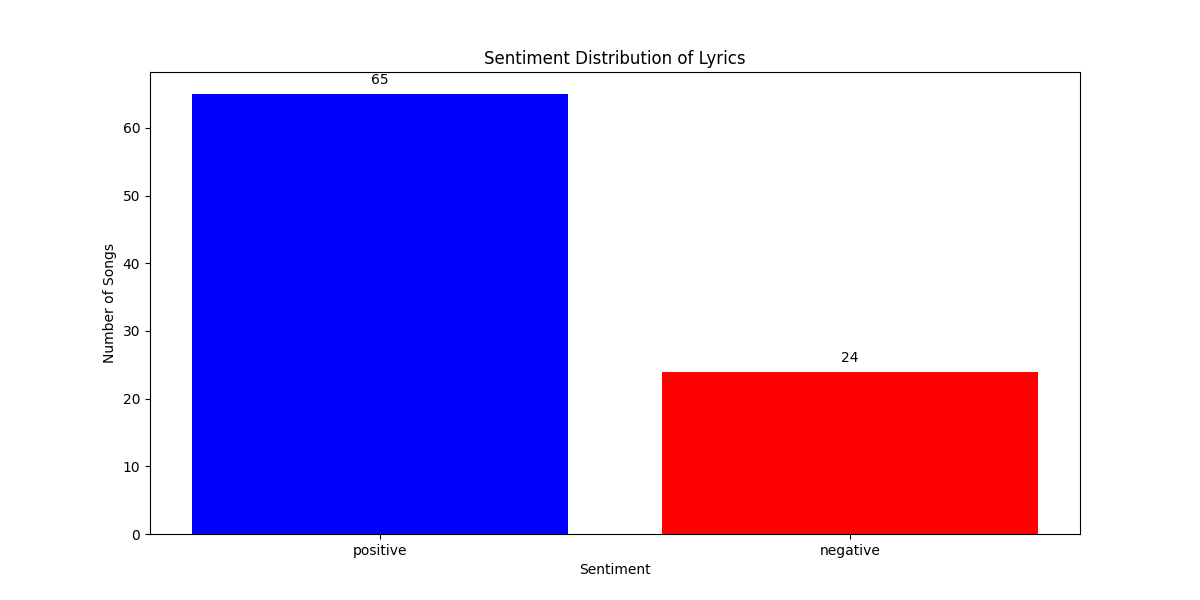

- A total of **65 songs** were classified as **positive**, while **24** were labeled as **negative** (retrieved lyrics for **89**/100 songs).
- This indicates a clear tilt toward **positive sentiment** in the lyrics of 1965.
- From the lyrics, we can conclude that mainstream music appeared to focus mostly on **love** and **optimism** in 1965.

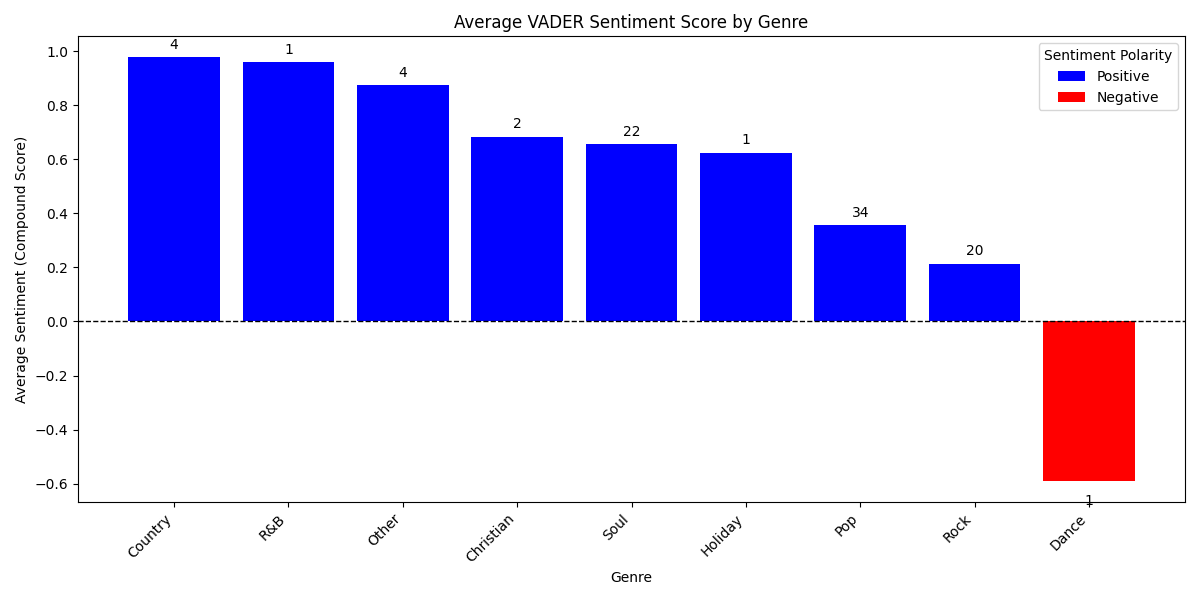

#### **Notable Positive Genres:**
-  Although **R&B** is technically listed second, it is only based on one song ("Papa's Got A Brand New Bag (Part I)" by *James Brown and the Famous Flames*) it does not fully exist yet in this time period as its predecessor, **Soul** music (under which **Funk** music evolves) was much more popular then. The song would later be classified a Funk record (a subgenre born from **Soul** music as well). So in this time period, **Soul** and **Country** showed the **highest average sentiment**, both nearing **+1.0**, reflecting *very positive emotional tones*. Although **Country** is also based on 4 songs, this checks out as these genres were historically known to surround topics of love and hope, especially in this time period.

- With regard to weight, one could say **Pop** music at the time, coming in at 34 songs, was showed highly positive sentiment, I strayed away from using it second being that intrinsically the genre does not commit to a particular sound/song style but rather simply popularity, especially at this time in music. However, it is important to not that majority of the POPular music was indeed positive in 1965.

- To no surprise, other genres with positive sentiment include:
  - **Christian** ("Is It Really Over" by *Jim Reeves*, though a country song, he is well-renowned for his Gospel records)
  - **Holiday** ("Houston" by *Dean Martin*, also actually a country record but Dean Martin is recognized for his Christmas music)

- Genres rooted in storytelling and spirituality (e.g., Country, Christian) exhibited consistently uplifting lyrical content.


#### **Notable Negative Genre:**
- **Dance** was the **only genre** to show a **negative average sentiment** (~ -0.6), though this result came from a **single song** and may not represent the genre as a whole.

### **1985**

For the dataset below, containing the **Billboard Hot 100** chart data for August 25th, 1985:

In [29]:
lyrics_with_sentiment_1985 = pd.read_csv('lyrics_with_sentiment_1985.csv')
lyrics_with_sentiment_1985.head()

,song_title,artist,simplified_genre,vader_sentiment,textblob_sentiment,sentiment_label
0,The Power Of Love,Huey Lewis & The News,Rock,0.9977,0.125061,positive
1,St. Elmo's Fire (Man In Motion),John Parr,Jazz,-0.9773,0.054055,negative
2,Freeway Of Love,Aretha Franklin,Soul,0.9998,0.258786,positive
3,We Don't Need Another Hero (Thunderdome),Tina Turner,R&B,-0.7329,0.070000,negative
4,Summer Of '69,Bryan Adams,Rock,0.9878,0.147734,positive


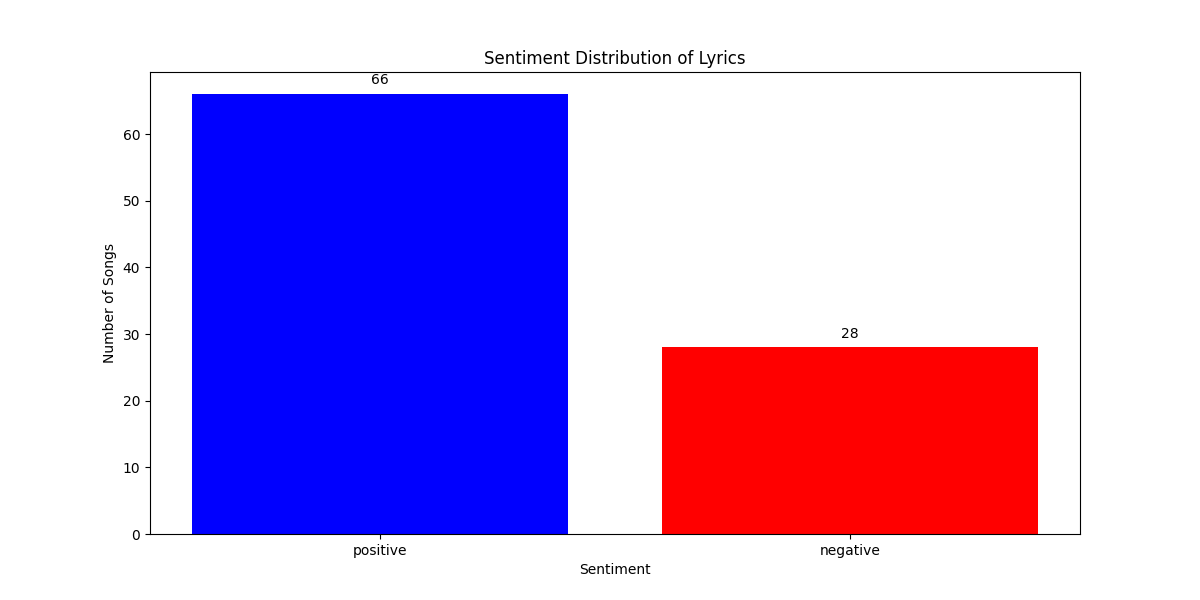

- Out of the lyrics analyzed from 1985, **66 songs were classified as positive**, while **28 were negative** (retrieved lyrics for **94**/100 songs).
- While positivity continued to dominate (just like in 1965), there's a **visible increase in negative sentiment**, indicating growing lyrical complexity and diversity reflected in the music.

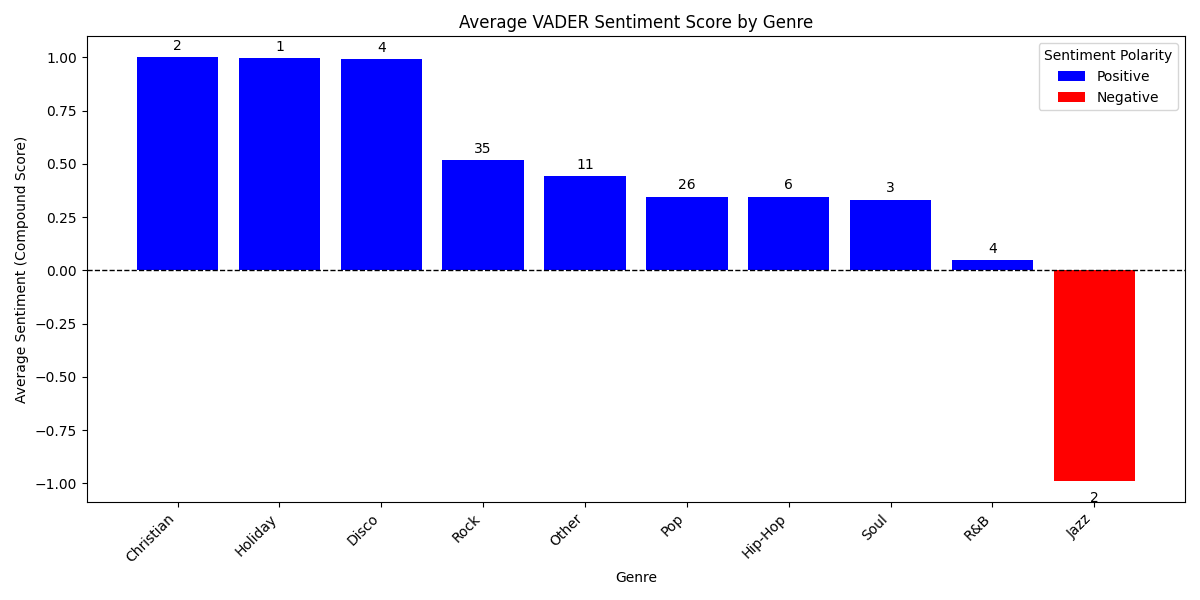

#### **High Sentiment Genres:**
- **Christian**, **Holiday**, and **Disco** (new genre evolved from the overarching **Dance**) showed extremely positive sentiment scores (near +1.0), despite small sample sizes. These genres typically contain **celebratory**, **hopeful**, or **uplifting messages**, with the latter usually being **upbeat** to match.

#### **Moderate Sentiment Genres:**
- Genres like **Rock**, **Pop**, **Hip-Hop** (new and rapidly-growing genre at the time), and **Soul** stayed within a modestly positive range (between ~+0.3 to +0.5), suggesting **nuanced lyrical themes**.

#### **Low Sentiment Genres:**
- **R&B** (also a relatively new genre, although accounted for in our 1965 data) hovered just above neutral.
- **Jazz** was the only genre with **negative sentiment**, averaging **-1.0**, although this was based on just **2 songs**, so conclusions should be cautious.

### **2005**

For the dataset below, containing the **Billboard Hot 100** chart data for August 25th, 2005:

In [30]:
lyrics_with_sentiment_2005 = pd.read_csv('lyrics_with_sentiment_2005.csv')
lyrics_with_sentiment_2005.head()

,song_title,artist,simplified_genre,vader_sentiment,textblob_sentiment,sentiment_label
0,We Belong Together,Mariah Carey,Holiday,-0.9733,0.020999,negative
1,Don't Cha,The Pussycat Dolls Featuring Busta Rhymes,Pop,0.9987,0.145083,positive
2,Pon de Replay,Rihanna,Pop,0.9810,0.234035,positive
3,Let Me Hold You,Bow Wow Featuring Omarion,R&B,0.1015,0.074754,positive
4,You And Me,Lifehouse,Rock,0.9161,0.127555,positive


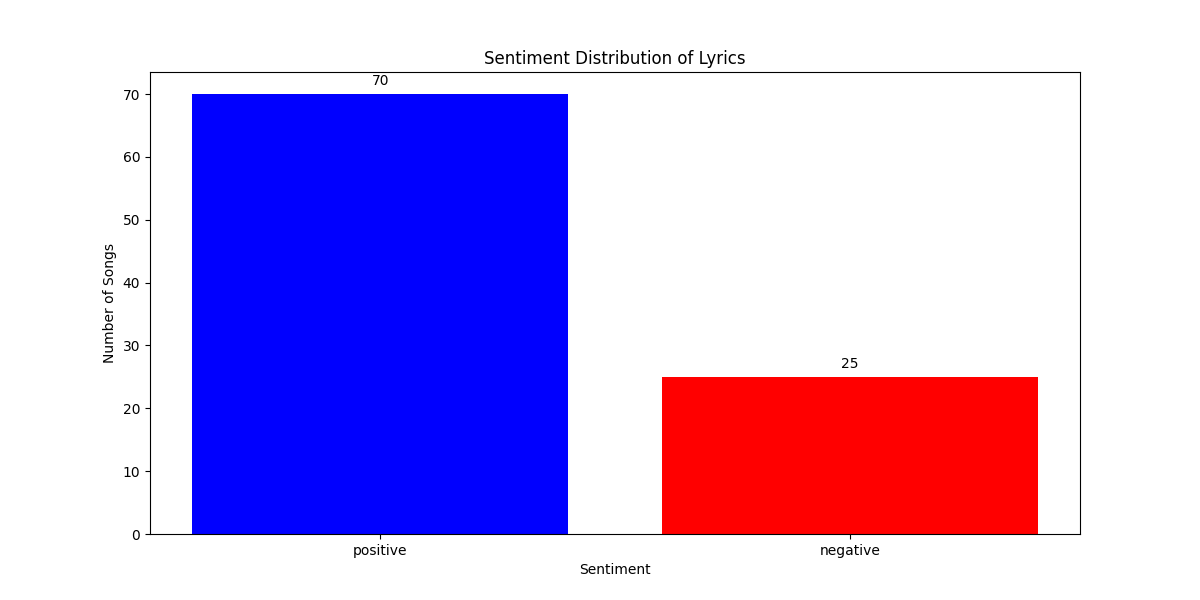

- In 2005, **70 songs were classified as positive**, while **25 songs were negative** (retrieved lyrics for 95/100 songs from the chart).
- Here, there is a noticeable increase in the trend of **positivity-dominating** popular music compared to the last 40 years, though the negative share (over 25%) shows a growing **emotional range** in lyrics.

> *By 2005, mainstream lyrics remained uplifting but allowed for more emotional complexity than previous decades.*

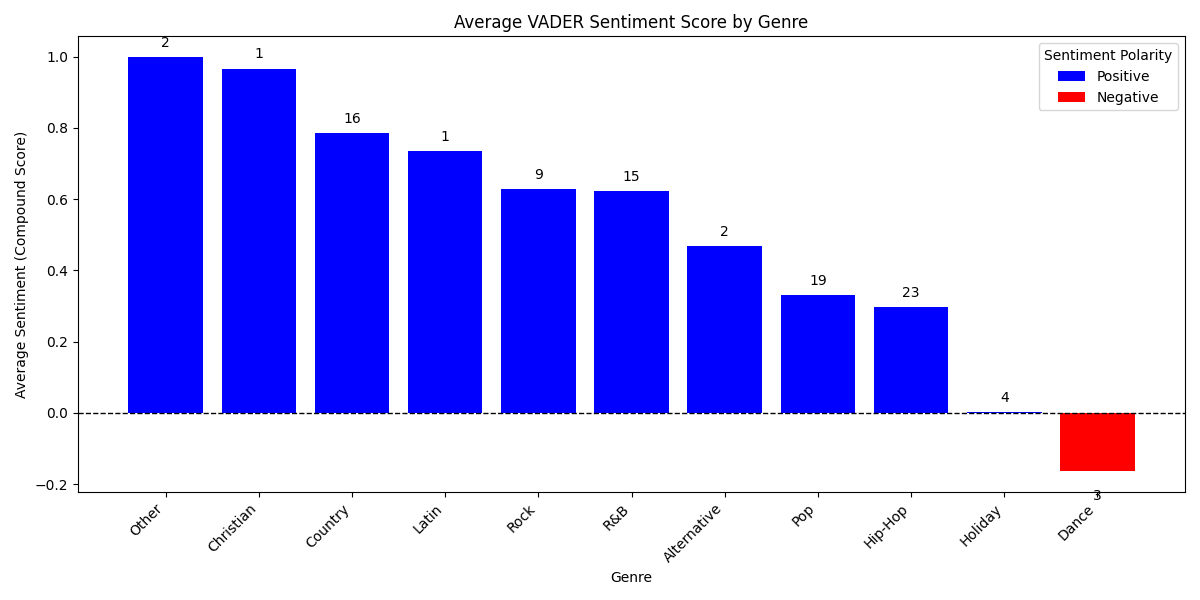

#### **High Sentiment Genres:**
- **Christian** music, as expected for aforementioned reasons, remained atop when it comes to positivity, despite being accounted for only one song.
- **Country** (with 16 songs) topped the chart with **very high positivity**, reminiscent of 1965 but with quadruple the sample size here.
- These genres often center around **faith, personal growth, love**, or **emotional resilience**.

#### **Moderate Sentiment Genres:**
- Genres such as **Latin** (1 song), **Rock** (9 songs), **R&B**, and **Alternative** (2 songs) held **moderately positive** average sentiment scores.

#### **Lower Sentiment Genres**:
- **Pop** and **Hip-Hop** dominated the charts by songs per genre and both genres fell into the **lower positive range**, suggesting more neutral lyrical tones.
- **Holiday** hovered around neutral (4 songs).
- **Dance** was the **only genre with a negative average sentiment**, indicating a darker tone—though the sample size was just 3 songs.

> *__Dance__ was the only genre to dip into negativity, which is shocking due to the nature of the music. This suggests a shift in the content of Dance songs in the 80's despite its upbeat sound*

Overall, we see that popular music in 2005 balanced a **mainstream optimism with evolving emotional depth**, this would lay the groundwork for broader expressive freedom to come in later years.

### **2025**

For the dataset below, containing May 2025's **Billboard Hot 100** chart data:

In [31]:
lyrics_with_sentiment_2025 = pd.read_csv('lyrics_with_sentiment_2025.csv')
lyrics_with_sentiment_2025.head()

,song_title,artist,simplified_genre,vader_sentiment,textblob_sentiment,sentiment_label
0,Luther,Kendrick Lamar & SZA,Hip-Hop,0.9697,0.231076,positive
1,Die With A Smile,Lady Gaga & Bruno Mars,Pop,0.9725,0.054034,positive
2,Ordinary,Alex Warren,Pop,-0.6988,-0.152315,negative
3,Nokia,Drake,Hip-Hop,0.9962,0.053837,positive
4,A Bar Song (Tipsy),Shaboozey,Country,0.8268,0.098512,positive


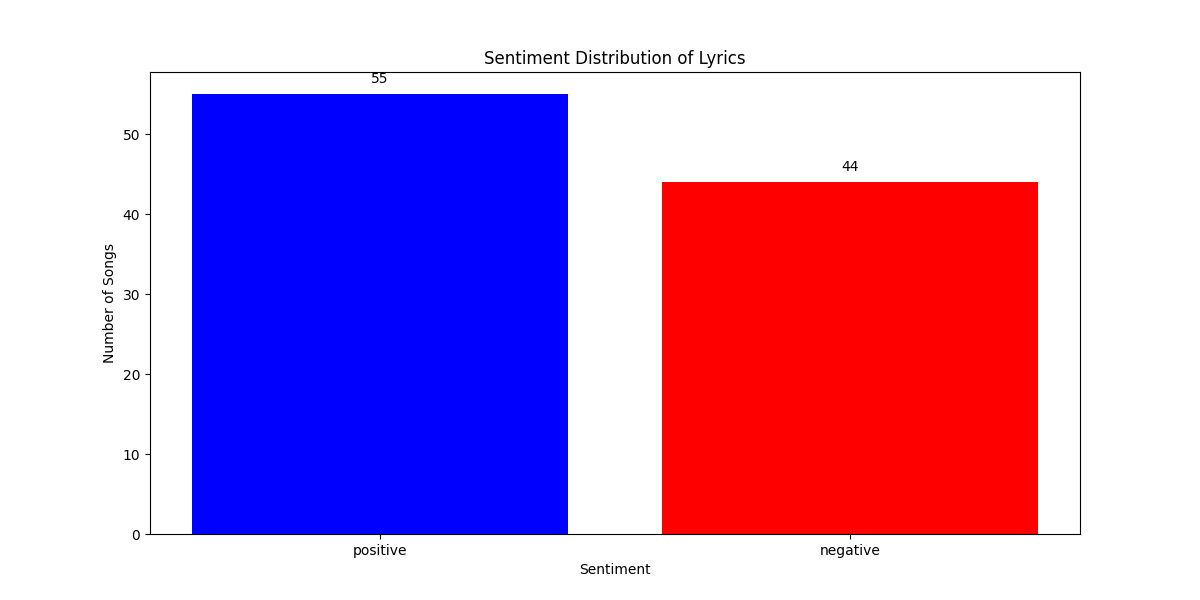

- In 2025, **55 songs were classified as positive**, and **44 songs were classified as negative** (retrieved lyrics for **99**/100 songs on the Hot 100 Chart).
- This marks the **narrowest margin** between positive and negative sentiment in all analyzed years.
- The trend shows a shift toward lyrical duality, with nearly equal representation of upbeat and downbeat emotional tones.

> *For the first time, nearly half of popular lyrics leaned negative—highlighting a generational pivot toward vulnerability, critique, or realism in songwriting.*

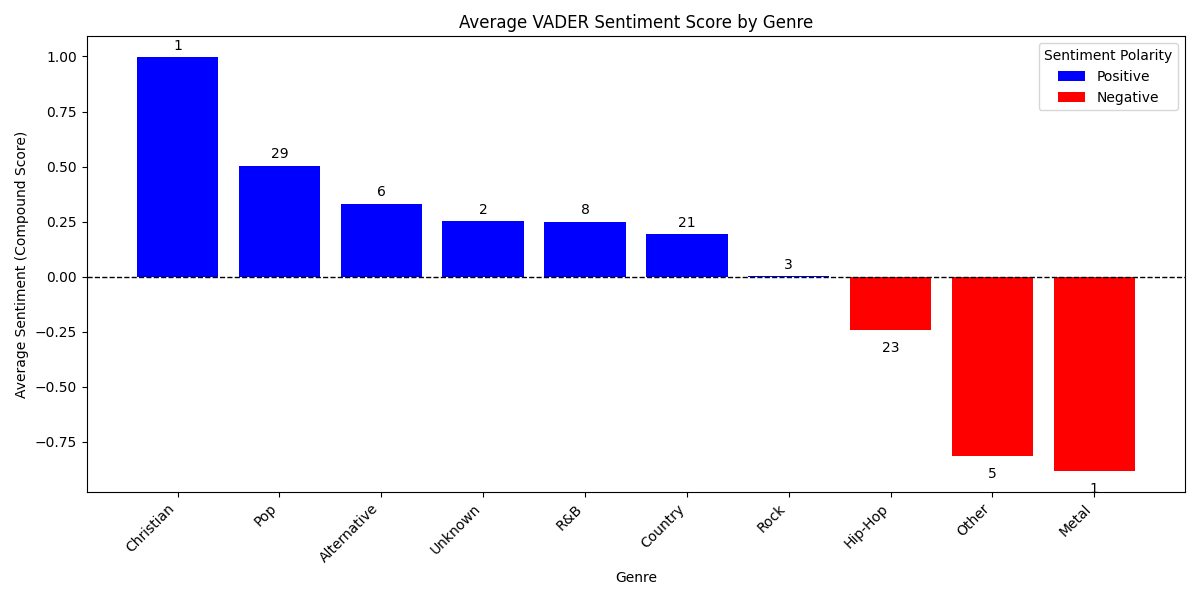

#### **Positive Sentiment Genres:**
- **Christian** (1 song, once more), **Pop** (with a huge 29 songs), and **Alternative** (6 songs) led the sentiment chart with mostly **positive compound scores**.
- Notably, even genres like **R&B** and **Country** maintained mild positivity, though not as high as earlier years.

#### **Moderate to Low Sentiment Genres:**
- **Rock** displayed close to neutral, reflecting ambiguity or possibly balance.
- Most notably, **Hip-Hop** (with 23 songs) took a massive dip into **negative territory** when compared to previous years
- **Metal**, with only 1 song however, registered the most negative sentiment overall (compound score near -0.9).

> *Hip-Hop likely embraced its most intense and emotional narratives in its history, diverging from the overall positivity seen in earlier decades.*


*Below we can combine the data for a clearer visualiztin of the sentiment distribution by year:*

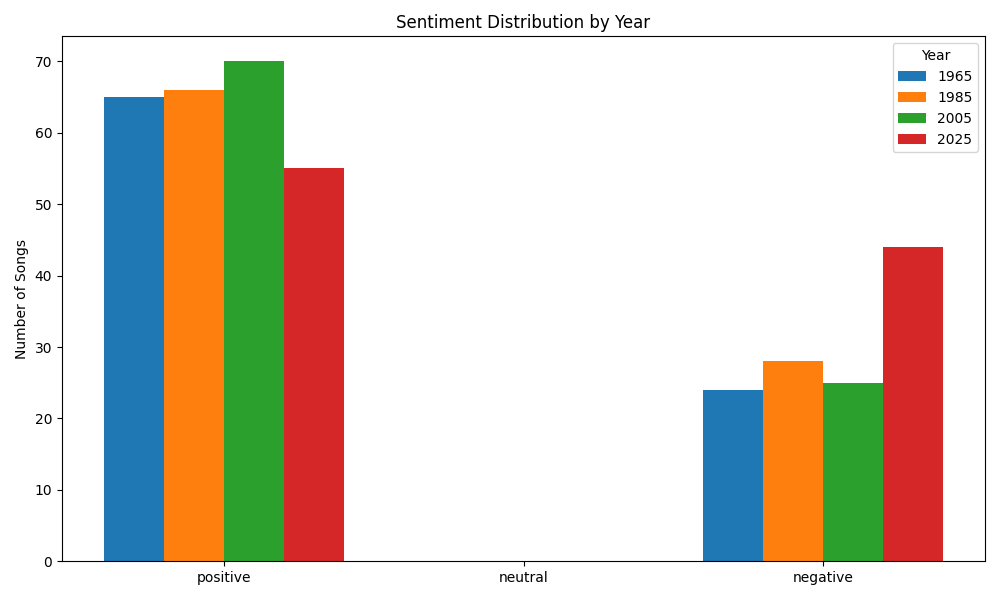

- 2025 marks a **critical inflection point**, where lyrics are nearly equally split between positivity and negativity.
- This could reflect broader **cultural introspection**, increased mental health awareness, or societal critique embedded in music.
- Genre-wise, sentiment is more polarized than in previous years, with **some genres amplifying hope** while others lean into **darkness or realism**.
---

### 🧾 **[Outro]**
&nbsp;&nbsp;&nbsp;&nbsp;This study examined the evolution of lyrical sentiment in *Billboard Hot 100* songs across four temporal benchmarks: **1965**, **1985**, **2005**, and **2025**, intentionally 20 years apart accounting for generational shifts. Leveraging VADER sentiment analysis and genre tagging via the Spotify API, the findings reveal a clear trajectory in the emotional tone of mainstream music. While the mid-20th century was characterized by predominantly positive lyrical content—particularly within genres such as Country, Christian, and Soul—subsequent decades introduced a gradual diversification of sentiment. By 2005, a more diverse emotional landscape emerged, and by 2025, the distribution between positive and negative sentiment approached near parity. Genre-specific patterns further underscore this shift, with traditionally optimistic genres maintaining positive polarity, while others such as Hip-Hop and Rock exhibited increasingly negative or introspective themes. These results suggest that popular music has progressively mirrored broader cultural, psychological, and sociopolitical complexities. Although, some inconsistencies prevailed primarily with older data surrounding music from the 1960s and 1980s, the data observed, being focused on lyrics, still helped to draw valuable insights to the sentimental growth in music in general regardless of any genre-specific misplacements. In sum, lyrical sentiment serves as a valuable lens for tracing the emotional and expressive evolution of popular music in response to changing societal contexts.